In [1]:
# import basic libraries for dataframe usage and viz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
## remove this cell before submitting

os.listdir()

['.ipynb_checkpoints',
 'sms_eligible_did_receive.csv',
 'SMS_Eligible_Received_SMS_No_Show',
 'SMS_Eligible_Received_SMS_Presented',
 'SMS_Eligible_Recieved_SMS.ipynb']

In [3]:
# this function will greatly simplify getting percentages based on condition
# this can be used as a template if you want to change the equality operator to inequality (>,<, etc..)
def column_percentage_calculator(df, column_name, condition):
    total_rows = df.shape[0]
    num_matched_rows = len(df.loc[(df[column_name] == condition)])
    percentage_matches_condition = (num_matched_rows / total_rows) * 100
    return percentage_matches_condition

# It can be assumed that each row that is in data frame was eligible to receive a SMS reminder as the csv it is based on contains only rows from the original dataset that were eligible to recieve SMS reminders.

In [4]:
# import df with pandas and visually inspect the head 
sms_eligible_did_receive_df = pd.read_csv('sms_eligible_did_receive.csv')
sms_eligible_did_receive_df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Between,Day_Num,Age Group,Interval Group
0,M,29,0,0,0,0,0,1,1,2,4,Young Adult,2 - 30
1,F,15,0,0,0,0,0,1,0,2,4,Youth,2 - 30
2,F,30,1,0,0,0,0,1,0,2,4,Young Adult,2 - 30
3,M,13,0,0,0,0,0,1,1,3,4,Youth,2 - 30
4,M,46,0,1,0,0,0,1,0,2,4,Adult,2 - 30


In [5]:
# examine df general stats
sms_eligible_did_receive_df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Between,Day_Num
count,35327.000000,35327.000000,35327.000000,35327.000000,35327.000000,35327.000000,35327.0,35327.000000,35327.000000,35327.000000
mean,37.446429,0.098791,0.192034,0.065729,0.023891,0.013559,1.0,0.275795,17.688142,1.676933
std,22.282020,0.298386,0.393906,0.247811,0.152712,0.115653,0.0,0.446920,15.757572,1.268645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,2.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,6.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,13.000000,2.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,26.000000,3.000000
max,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,90.000000,5.000000


In [6]:
# examine df structure
sms_eligible_did_receive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35327 entries, 0 to 35326
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          35327 non-null  object
 1   Age             35327 non-null  int64 
 2   Scholarship     35327 non-null  int64 
 3   Hipertension    35327 non-null  int64 
 4   Diabetes        35327 non-null  int64 
 5   Alcoholism      35327 non-null  int64 
 6   Handicap        35327 non-null  int64 
 7   SMS_received    35327 non-null  int64 
 8   No-show         35327 non-null  int64 
 9   Days_Between    35327 non-null  int64 
 10  Day_Num         35327 non-null  int64 
 11  Age Group       35327 non-null  object
 12  Interval Group  35327 non-null  object
dtypes: int64(10), object(3)
memory usage: 3.5+ MB


In [7]:
# calculate no-show percentage of SMS-Eligible appointments THAT DID RECEIVE A SMS REMINDER
percent_noshow = column_percentage_calculator(sms_eligible_did_receive_df, 'No-show', 1)
percent_presented = 100 - round(percent_noshow, 2)
print('{}% OF APPOINTMENTS THAT DID RECEIVE A REMINDER WERE NO-SHOW'.format(round(percent_noshow,2)))
print('{}% OF APPOINTMENTS THAT DID RECEIVE A REMINER PRESENTED AT THEIR APPOINTMENT.'.format(percent_presented))

27.58% OF APPOINTMENTS THAT DID RECEIVE A REMINDER WERE NO-SHOW
72.42% OF APPOINTMENTS THAT DID RECEIVE A REMINER PRESENTED AT THEIR APPOINTMENT.


Text(0.5, 1.0, 'No-Show/Presented Binary Distribution')

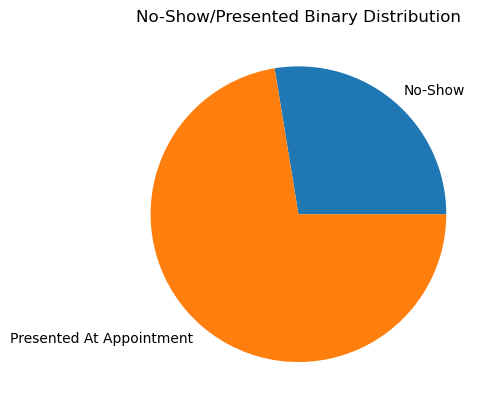

In [8]:
# visualize gender binary distribution
no_show_and_present_percents = [percent_noshow, percent_presented ]
labels = ['No-Show', 'Presented At Appointment']

fig, ax = plt.subplots()
ax.pie(no_show_and_present_percents, labels = labels)
ax.set_title('No-Show/Presented Binary Distribution')

### AGE 

<AxesSubplot:ylabel='Frequency'>

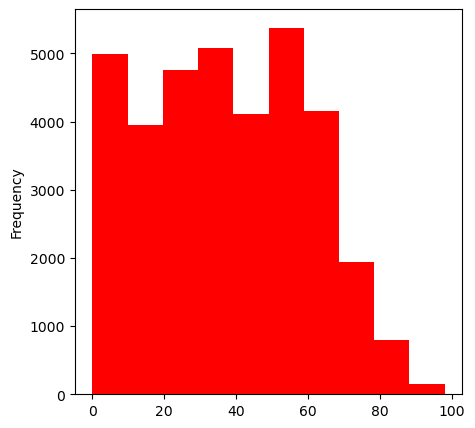

In [9]:
sms_eligible_did_receive_df.Age.plot(kind='hist', figsize=(5,5), color='red')

In [10]:
# calculate the median age for SMS-Eligible appointments that DID RECEIVE SMS REMINDER
age_median = sms_eligible_did_receive_df.Age.median()
print('{} is the median age.'.format(age_median))

37.0 is the median age.


### DAYS_BETWEEN 

<AxesSubplot:ylabel='Frequency'>

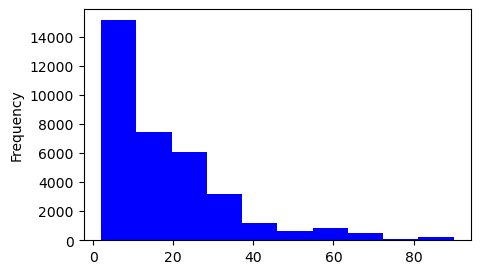

In [11]:
# visualize 'Days_Between' column distribution
sms_eligible_did_receive_df.Days_Between.plot(kind='hist', figsize=(5,3), color='blue')

### GENDER %s and Pie Graph

In [12]:
# calculate percent each gender of 'SMS-Eligible Did-Receive SMS' rows with column_percentage_calculator already defined
sms_eligible_did_receive_SMS_male_percent = column_percentage_calculator(sms_eligible_did_receive_df, 'Gender', 'M')
sms_eligible_did_receive_SMS_female_percent = column_percentage_calculator(sms_eligible_did_receive_df, 'Gender', 'F')
print('{}% of SMS-eligible appointments were for male patients.'.format(round(sms_eligible_did_receive_SMS_male_percent, 2)))
print('{}% of SMS-eligible appointments were for female patients.'.format(round(sms_eligible_did_receive_SMS_female_percent, 2)))

31.78% of SMS-eligible appointments were for male patients.
68.22% of SMS-eligible appointments were for female patients.


Text(0.5, 1.0, 'SMS-Eligible and SMS Received Gender Percentage')

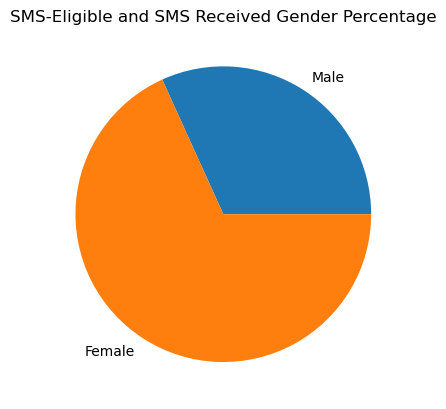

In [13]:
# visualize gender binary distribution
gender_percents = [sms_eligible_did_receive_SMS_male_percent, sms_eligible_did_receive_SMS_female_percent ]
labels = ['Male', 'Female']

fig, ax = plt.subplots()
ax.pie(gender_percents, labels = labels)
ax.set_title('SMS-Eligible and SMS Received Gender Percentage')

### INTERVAL_GROUP %'s and Bar Graph

In [14]:
# obtain percentages of Interval Groups using the column_percentage_calculator function defined earlier 
two_to_thirty_percentage = column_percentage_calculator(sms_eligible_did_receive_df, 'Interval Group', '2 - 30')
num_thirtyone_to_sixty_percentage = column_percentage_calculator(sms_eligible_did_receive_df, 'Interval Group', '31 - 60')
num_sixtyone_to_ninety_percentage = column_percentage_calculator(sms_eligible_did_receive_df, 'Interval Group', '61 - 90')

print('Percentage of SMS-Eligible THAT RECEIVED SMS REMINDER appointments scheduled between 2 and 30 days out ---> {}%'.format(round(two_to_thirty_percentage,2)))
print('Percentage of SMS-Eligible THAT RECEIVED SMS REMINDER appointments scheduled between 31 and 60 days out ---> {}%'.format(round(num_thirtyone_to_sixty_percentage, 2)))
print('Percentage of SMS-Eligible THAT RECEIVED SMS REMINDER appointments scheduled between 61 and 90 days out ---> {}%'.format(round(num_sixtyone_to_ninety_percentage, 2)))

Percentage of SMS-Eligible THAT RECEIVED SMS REMINDER appointments scheduled between 2 and 30 days out ---> 83.14%
Percentage of SMS-Eligible THAT RECEIVED SMS REMINDER appointments scheduled between 31 and 60 days out ---> 13.61%
Percentage of SMS-Eligible THAT RECEIVED SMS REMINDER appointments scheduled between 61 and 90 days out ---> 3.24%


<AxesSubplot:>

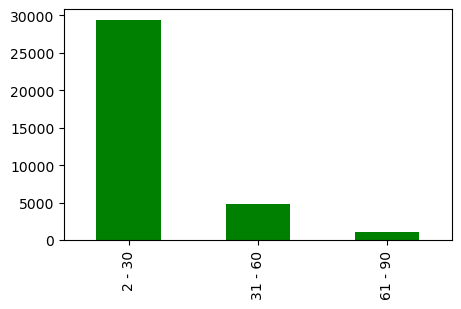

In [15]:
# visualize Interval Group categorical distribution in a bar plot
sms_eligible_did_receive_df['Interval Group'].value_counts().plot(kind='bar', figsize =(5,3), color='green')

### AGE BRACKETS %'s and Bar Graph

In [16]:
# calculate percentage for age group categorical column values
sms_eligible_youth_percentage = column_percentage_calculator(sms_eligible_did_receive_df, 'Age Group', 'Youth')
sms_eligible_young_adult_percentage = column_percentage_calculator(sms_eligible_did_receive_df, 'Age Group', 'Young Adult')
sms_eligible_adult_percentage = column_percentage_calculator(sms_eligible_did_receive_df, 'Age Group', 'Adult')
sms_eligible_older_adult_percentage = column_percentage_calculator(sms_eligible_did_receive_df, 'Age Group', 'Older Adult and Seniors')

print('Percentage of SMS-Eligible THAT RECEIVED SMS REMINDER appointments for Youths {}%'.format(round(sms_eligible_youth_percentage, 2)))
print('Percentage of SMS-Eligible THAT RECEIVED SMS REMINDER appointments for Young Adults {}%'.format(round(sms_eligible_young_adult_percentage, 2)))
print('Percentage of SMS-Eligible THAT RECEIVED SMS REMINDER appointments for Adults {}%'.format(round(sms_eligible_adult_percentage, 2)))
print('Percentage of SMS-Eligible THAT RECEIVED SMS REMINDER appointments for Older Adults and Seniors {}%'.format(round(sms_eligible_older_adult_percentage, 2)))

Percentage of SMS-Eligible THAT RECEIVED SMS REMINDER appointments for Youths 23.84%
Percentage of SMS-Eligible THAT RECEIVED SMS REMINDER appointments for Young Adults 24.95%
Percentage of SMS-Eligible THAT RECEIVED SMS REMINDER appointments for Adults 26.77%
Percentage of SMS-Eligible THAT RECEIVED SMS REMINDER appointments for Older Adults and Seniors 24.44%


<AxesSubplot:>

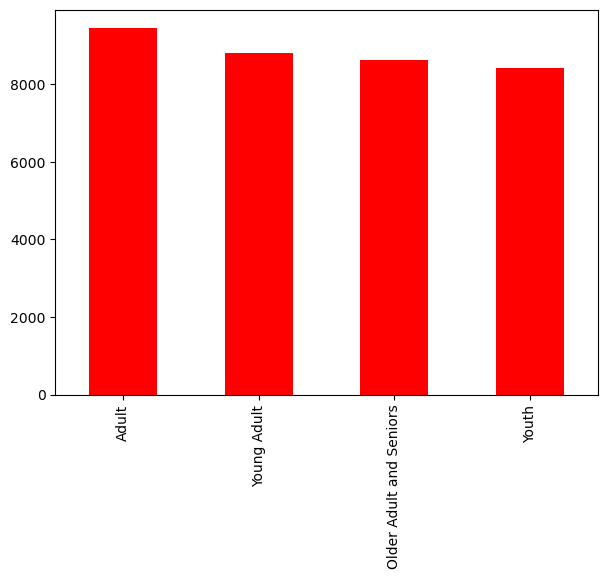

In [17]:
# create basic viz for age brackets/buckets
sms_eligible_did_receive_df['Age Group'].value_counts().plot(kind='bar', figsize=(7,5), color='red')

### CONDITIONS %s and Bar Graph

__As each 'condition' is it's own column and the values are only binary (0 for no, 1 for yes), the percentages for these variables WRT to all SMS-ELIGIBLE THAT DID RECEIVE SMS REMINDER rows was obtained from the .describe() command and its output above. These values and respective labels will be used to visualize these variables on a bar graph.__

[Text(0, 0, 'Handicap'),
 Text(1, 0, 'Alcoholism'),
 Text(2, 0, 'Diabetes'),
 Text(3, 0, 'Scholarship Program'),
 Text(4, 0, 'Hypertension')]

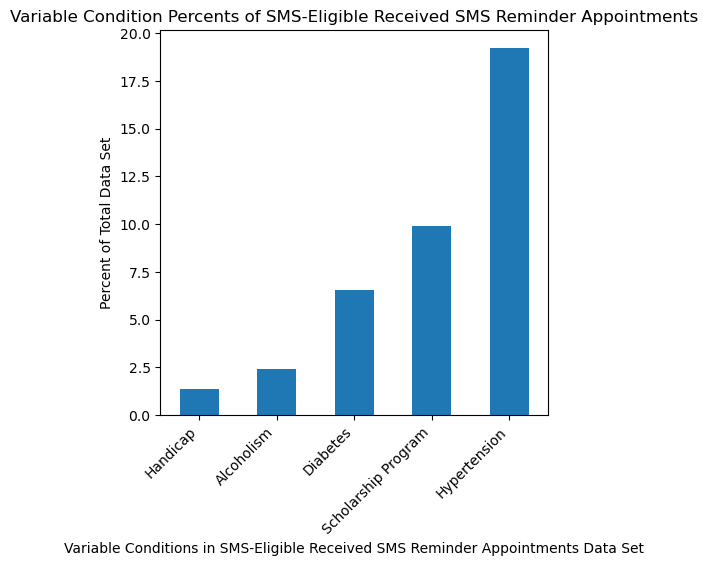

In [18]:
# create pandas series to graph and list of respective labels
condition_percents = pd.Series([1.36,  2.39, 6.57, 9.88, 19.20])
labels = ['Handicap', 'Alcoholism', 'Diabetes', 'Scholarship Program', 'Hypertension']


# plot graph of variable condition percentages
plt.figure(figsize=(5,5))
ax = condition_percents.plot(kind='bar')
ax.set_title('Variable Condition Percents of SMS-Eligible Received SMS Reminder Appointments')
ax.set_xlabel('Variable Conditions in SMS-Eligible Received SMS Reminder Appointments Data Set')
ax.set_ylabel('Percent of Total Data Set')
ax.set_xticklabels(labels, rotation=45, ha='right')

# These are descriptive statistics of ROWS THAT DID RECEIVE SMS REMINDER.

- __27.58% OF APPOINTMENTS THAT DID RECEIVE A SMS REMINDER WERE NO-SHOW.__
- __72.42% OF APPOINTMENTS THAT DID RECEIVE A SMS REMINDER PRESENTED AT THEIR APPOINTMENT.__ 
- __The average age is 37.45.__
- __The median age is 37.0__
- __The average time between the ScheduledDay and AppointmentDay is 18 (17.6 rounded) days.__
- __Approximately 9.88% of SMS-Eligible appointments are for patients enrolled in the 'scholarship' program (explained earlier in analysis).__
- __Approximately 19.20% of SMS-Eligible appointments THAT DID RECEIVE A SMS REMINDER are for patients suffering from hipertension (hypertension).__
- __Approximately 6.57% of SMS-Eligible appointments THAT DID RECEIVE A SMS REMINDER are for patients suffering from diabetes.__
- __Approximately 2.39% of SMS-Eligible appointments THAT DID RECEIVE A SMS REMINDER are for patients suffering from alcoholism.__
- __Approximately 1.36% of SMS-Eligible appointments THAT DID RECEIVE A SMS REMINDER are for patients identifying as handicapped.__
- __Approximately 31.78% of all SMS-reminder eligible rows were for appointments THAT DID RECEIVE A SMS REMINDER for male patients.__
- __Approximately 68.22% of all SMS-reminder elibible rows were for appointments THAT DID RECEIVE A SMS REMINDER for female patients.__
- __Approximately 23.84% of SMS-Eligible appointments THAT DID RECEIVE A SMS REMINDER for Youths.__
- __Approximately 24.95% of SMS-Eligible appointments THAT DID RECEIVE A SMS REMINDER for Young Adults.__ 
- __Approximately 26.77% of SMS-Eligible appointments THAT DID RECEIVE A SMS REMINDER for Adults.__
- __Approximately 24.44% of SMS-Eligible appointments THAT DID RECEIVE A SMS REMINDER for Older Adults and Seniors.__ 
- __Approximately 83.14%% of SMS-Eligible appointments THAT DID RECEIVE A SMS REMINDER were scheduled between 2 and 30 days out.__
- __Approximately 13.61% of SMS-Eligible appointments THAT DID RECEIVE A SMS REMINDER scheduled between 31 and 60 days out.__
- __Approximately 3.24%% of SMS-Eligible appointments THAT DID RECEIVE A SMS REMINDER scheduled between 61 and 90 days out.__

# We need to split this part of the data one more time to glean some deeper insights. From this point, now that we have gathered the statistical information we sought out to find from this population, SMS-ELIGIBLE ROWS THAT DID RECIEVE A REMINDER, we can split this population into 2 new DFs/csvs for further analysis. 

# The first new DF/csv (1 of 2) will be for SMS-ELIGIBLE DID RECEIVE SMS REMINDER PRESENTED AT APPOINTMENT rows.

# The second new DF/csv (2 of 2) will be for SMS-ELIGIBLE DID RECEIVE SMS REMINDER NO SHOW rows.

In [19]:
# filter out only rows that PRESENTED AT APPOINTMENT into new df
sms_eligible_sms_received_appointment_presented_df = sms_eligible_did_receive_df.loc[(sms_eligible_did_receive_df['No-show'] == 0)]

# visually inspect new df
sms_eligible_sms_received_appointment_presented_df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Between,Day_Num,Age Group,Interval Group
1,F,15,0,0,0,0,0,1,0,2,4,Youth,2 - 30
2,F,30,1,0,0,0,0,1,0,2,4,Young Adult,2 - 30
4,M,46,0,1,0,0,0,1,0,2,4,Adult,2 - 30
5,F,38,1,0,0,0,0,1,0,3,4,Adult,2 - 30
6,M,85,0,1,0,0,0,1,0,8,4,Older Adult and Seniors,2 - 30


In [20]:
# filter out only rows that NO-SHOW AT APPOINTMENT into new df
sms_eligible_sms_received_appointment_no_show_df = sms_eligible_did_receive_df.loc[(sms_eligible_did_receive_df['No-show'] == 1)]

# visually inspect new df
sms_eligible_sms_received_appointment_no_show_df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Between,Day_Num,Age Group,Interval Group
0,M,29,0,0,0,0,0,1,1,2,4,Young Adult,2 - 30
3,M,13,0,0,0,0,0,1,1,3,4,Youth,2 - 30
8,F,58,0,0,0,0,0,1,1,2,4,Older Adult and Seniors,2 - 30
9,F,27,0,0,0,0,0,1,1,28,4,Young Adult,2 - 30
10,F,19,0,0,0,0,0,1,1,28,4,Young Adult,2 - 30


In [21]:
# # save new dfs to csvs in their new respective folders for further analysis
# sms_eligible_sms_received_appointment_presented_df.to_csv(os.path.join('SMS_Eligible_Received_SMS_Presented','sms_received_appointment_presented.csv'), index=False)
# sms_eligible_sms_received_appointment_no_show_df.to_csv(os.path.join('SMS_Eligible_Received_SMS_No_Show', 'sms_received_appointment_no_show.csv'), index=False)

In [22]:
1==1

True

# This is the end of this section of EDA for ROWS THAT RECEIVED SMS REMINDER AND WERE ELIGIBLE 